<a href="https://colab.research.google.com/github/H-y-hoon/Python_Programming3/blob/main/Data_analysis_assignment(50_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브와 mount(연결)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#library
import pandas as pd
import numpy as np

normal = pd.read_csv('/content/drive/MyDrive/AI SPARK 챌린지/dataset/train_data.csv')
abnormal = pd.read_csv('/content/drive/MyDrive/AI SPARK 챌린지/dataset/test_data.csv')

 - normal: no outlier

 - abnormal: there is an outlier

#**Data compute**

In [ ]:
normal.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [ ]:
abnormal.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


In [ ]:
normal.isnull().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [ ]:
abnormal.isnull().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

- confirm no missing values

In [ ]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [ ]:
abnormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     7389 non-null   float64
 1   air_end_temp   7389 non-null   float64
 2   out_pressure   7389 non-null   float64
 3   motor_current  7389 non-null   float64
 4   motor_rpm      7389 non-null   float64
 5   motor_temp     7389 non-null   float64
 6   motor_vibe     7389 non-null   float64
 7   type           7389 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 461.9 KB


In [ ]:
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,2463.0,2.128843,1.202328e+00,0.33,1.28,1.96,2.820,6.22
air_end_temp,2463.0,49.001137,8.725091e+00,32.03,41.60,48.98,56.355,64.96
out_pressure,2463.0,0.700000,1.110448e-16,0.70,0.70,0.70,0.700,0.70
motor_current,2463.0,27.490715,1.360460e+01,5.34,17.11,25.85,36.000,72.00
motor_rpm,2463.0,2372.576939,6.878708e+02,1201.00,1784.50,2358.00,2971.000,3564.00
motor_temp,2463.0,65.766707,7.797152e+00,50.36,59.15,65.64,72.275,80.52
motor_vibe,2463.0,3.452972,1.576386e+00,1.97,2.88,3.26,3.730,21.87
type,2463.0,2.957369,2.230113e+00,0.00,1.00,3.00,5.000,7.00


In [ ]:
abnormal.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,7389.0,2.103129,1.163998,0.34,1.28,1.94,2.77,6.24
air_end_temp,7389.0,49.042735,8.686208,32.08,41.51,48.76,56.58,65.54
out_pressure,7389.0,0.699840,0.005377,0.49,0.70,0.70,0.70,0.70
motor_current,7389.0,27.417935,13.234089,5.37,17.20,26.17,35.86,74.00
motor_rpm,7389.0,2373.820003,687.737182,1200.00,1774.00,2355.00,2972.00,3564.00
motor_temp,7389.0,65.771623,7.741473,50.42,59.11,65.52,72.44,82.39
motor_vibe,7389.0,3.345523,0.644199,1.97,2.89,3.26,3.73,6.26
type,7389.0,2.957369,2.229811,0.00,1.00,3.00,5.00,7.00


- difficult to check abnormal values ​​with one data frame
> Therefore, compare the figures by dividing them by type.


In [ ]:
'''
no_0 = normal[normal['type'] == 0].copy()
no_1 = normal[normal['type'] == 1].copy()
no_2 = normal[normal['type'] == 2].copy()
no_3 = normal[normal['type'] == 3].copy()
no_4 = normal[normal['type'] == 4].copy()
no_5 = normal[normal['type'] == 5].copy()
no_6 = normal[normal['type'] == 6].copy()
no_7 = normal[normal['type'] == 7].copy()

ab_0 = abnormal[abnormal['type'] == 0].copy()
ab_1 = abnormal[abnormal['type'] == 1].copy()
ab_2 = abnormal[abnormal['type'] == 2].copy()
ab_3 = abnormal[abnormal['type'] == 3].copy()
ab_4 = abnormal[abnormal['type'] == 4].copy()
ab_5 = abnormal[abnormal['type'] == 5].copy()
ab_6 = abnormal[abnormal['type'] == 6].copy()
ab_7 = abnormal[abnormal['type'] == 7].copy()
'''

#efficient code
#normal
nor_dict={}
nor = {}
for i in range(8):
  nor_dict[i] = normal[normal['type'] == i].iloc[:,:-1]
  nor[i] = nor_dict[i]

#abnormal
ab_dict={}
ab = {}
for i in range(8):
  ab_dict[i] = abnormal[abnormal['type'] == i].iloc[:,:-1]
  ab[i] = ab_dict[i]

In [ ]:
nor[1].head()

#complete!

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
432,1.73,55.16,0.7,25.60,2973.0,71.03,3.45
433,1.31,46.05,0.7,19.32,2244.0,62.93,3.05
434,1.33,46.59,0.7,19.69,2287.0,63.41,3.07
435,1.87,58.00,0.7,27.56,3200.0,73.56,3.58
436,1.68,53.98,0.7,24.78,2878.0,69.98,3.40


air_inflow	공기 흡 입유량	

air_end_temp	공기 말단 온도

out_pressure	토출 압력	

motor_current	모터 전류

moter_rpm	모터 회전수	

motor_temp	모터 온도

motor_vibe	모터 진동	


type	설비 번호

설비번호[0,4,5,6,7]- 30HP(마력)	

설비 번호 1 – 20HP	

설비 번호 2 – 10HP	

설비 번호 3 - 50HP


##정상수치 데이터로 상관관계 확인

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

- 각 컬럼마다 단위가 다르므로 스케일링 실시
> normal 데이터는 모두 정상수치이고, 각 컬럼 별 한계치를 알아야하기 때문에 **Standard scaling** 사용

- 이 기법의 특징은 변수 간의 상대적인 크기를 비교 가능하게 만들어줌
- 다른 스케일링 기법과 달리 이상치에 상대적으로 영향을 적게 받음
- 변수의 분포를 유지

In [ ]:
#클러스터링은 연속형 변수만 가능
scaler = StandardScaler()
normal_scaled = scaler.fit_transform(normal)
scaled_normal = pd.DataFrame(normal_scaled)  #변수 표준화
scaled_normal

,0,1,2,3,4,5,6,7
0,-0.448257,-0.917212,-1.110223e-16,-0.511748,-1.007046,-0.910351,-0.331821,-1.326376
1,0.699749,1.178320,-1.110223e-16,0.802045,1.118785,1.172883,0.188462,-1.326376
2,-0.182053,-0.425427,-1.110223e-16,-0.202966,-0.508305,-0.421612,-0.211268,-1.326376
3,0.200616,0.266970,-1.110223e-16,0.230799,0.194005,0.265958,-0.039955,-1.326376
4,-0.190372,-0.434598,-1.110223e-16,-0.208848,-0.517029,-0.430592,-0.211268,-1.326376
...,...,...,...,...,...,...,...,...
2458,0.125746,0.137432,-1.110223e-16,0.149927,0.063140,0.137680,-0.071680,1.813115
2459,-0.073907,-0.236279,-1.110223e-16,-0.084600,-0.316369,-0.234326,-0.160509,1.813115
2460,-0.781013,-1.520194,-1.110223e-16,-0.889638,-1.619204,-1.510693,-0.477754,1.813115
2461,-0.764375,-1.490389,-1.110223e-16,-0.871259,-1.588669,-1.481189,-0.471409,1.813115


- 본 데이터는 레이블이 없어 비지도학습이 필요함
- 따라서, 클러스터링을 통한 데이터의 패턴 혹은 분포를 확인할 필요가 있음

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

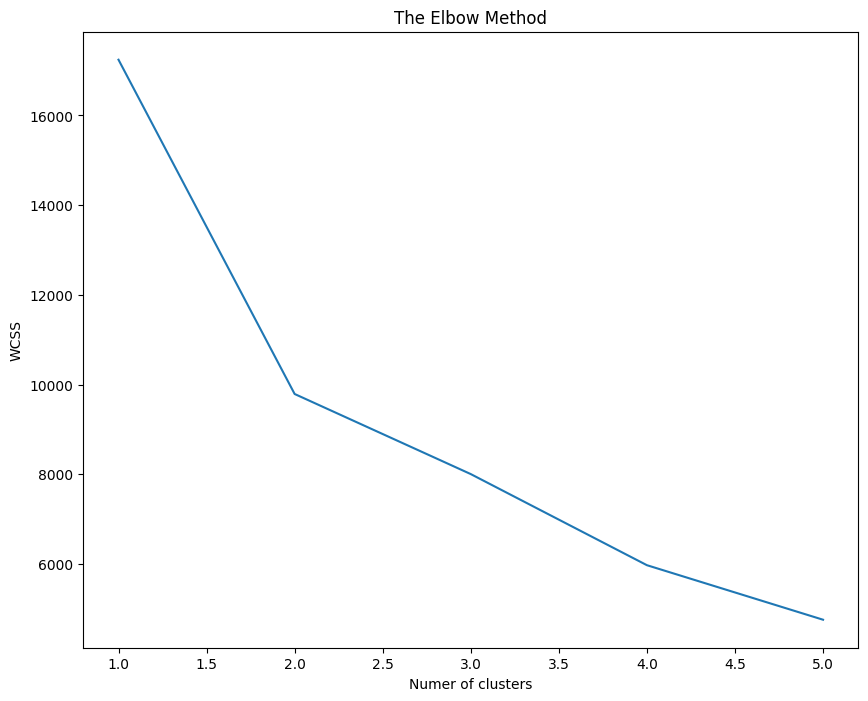

In [ ]:
#elbow method
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,6):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(scaled_normal)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
#최적의 k-means 값은 '2'이다
#sclaed된 데이터를 넣어 스케일링

kmeans = KMeans(n_clusters = 2, random_state = 42)
clusters = kmeans.fit(scaled_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###추론
- k의 값이 '2'이므로 데이터셋을 두 개의 서로 다른 그룹으로 분류하는 것이 가장 적합한 클러스터링 결과라고 해석할 수 있음

In [ ]:
#clustering 변수인 clusters를 원본데이터에 넣기
normal['cluster'] = clusters.labels_

###clusters를 원본 데이터에 추가하는 이유
 * 각 데이터 포인트가 어떤 클러스터에 속하는지 확인할 수 있음
 * 해당 클러스터에 속한 데이터의 특성이나 통계 정보를 쉽게 추출 가능함
 * 이를 통해 시각화로 데이터의 패턴과 클러스터 간의 관계를 살펴볼 수 있음




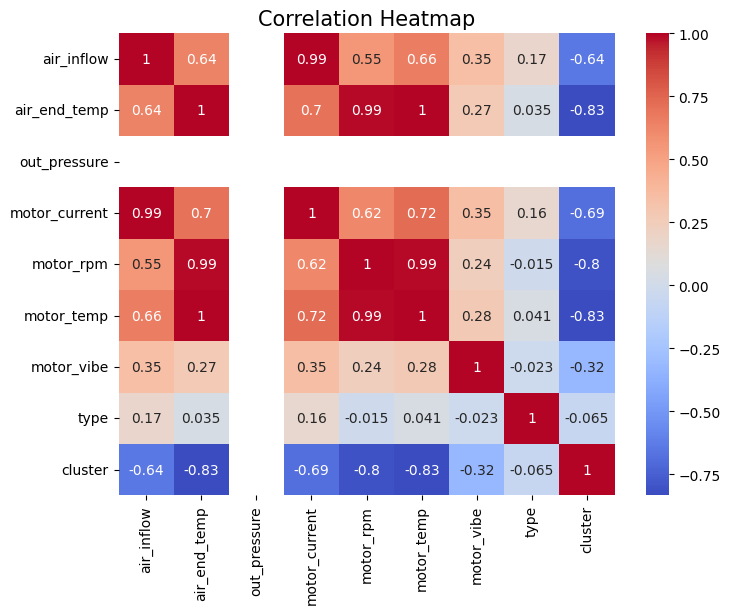

In [ ]:
#Heatmap으로 상관관계 및 계수 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(normal.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

##상관관계
0.99
 * air inflow - motor current
 * air end temp - motor rpm
 * motor rpm - motor temp

0.72
 * motor current - motor temp
 * motor current - air end temp

##해석
- 공기흡입유량이 증가하면 모터 전류가 증가한다. 아주 강한 양의 상관관계를 보이므로 각 타입 별로 공기흡입유량과 모터전류를 시각화해볼 필요가 있다.